# Data Science for puppies

### Today we will gain insights from the breast cancer dataset. The dataset in available in sklearn.datasets so you don't need to download it separately

#### This is relatively simple data to work with, infact i got an accuracy of 95% without any preprocessing step using XGB

#### Let us start riight away!

#### Importing all the required libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

#### Looking for all the components in the cancer dataset and exploring them to make the pandas dataset

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

#### Making a pandas dataframe for future processing and visualizations

In [5]:
dataset=pd.DataFrame(np.c_[cancer['data'],cancer['target']],
                    columns=np.append(cancer['feature_names'],['target']))

In [6]:
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [7]:
len(dataset[dataset['target']==1]),len(dataset[dataset['target']==0])

(357, 212)

#### Making a count plot for number of observations of each class

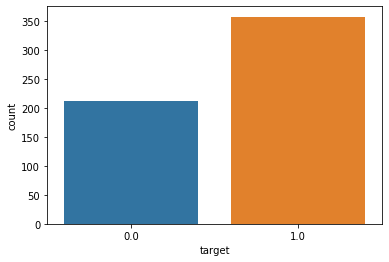

In [8]:
ax=sns.countplot(dataset['target'])

#### Analyzing the distribution of data

In [9]:
dataset.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### Looking for null values if any

In [10]:
dataset.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

#### Looking for the data type of features which require parsing 

In [11]:
dataset.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

#### As we have many features it is important to find the best features among them to make our analysis more efficient. 
Using correlation matrix for analyzing

In [12]:
dataset.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


#### Dividing the dataset for preprocessing

In [13]:
X=dataset.iloc[:,:30]
y=dataset.iloc[:,-1]
X.shape, y.shape

((569, 30), (569,))

#### Using heatmap to see correlated features, if any

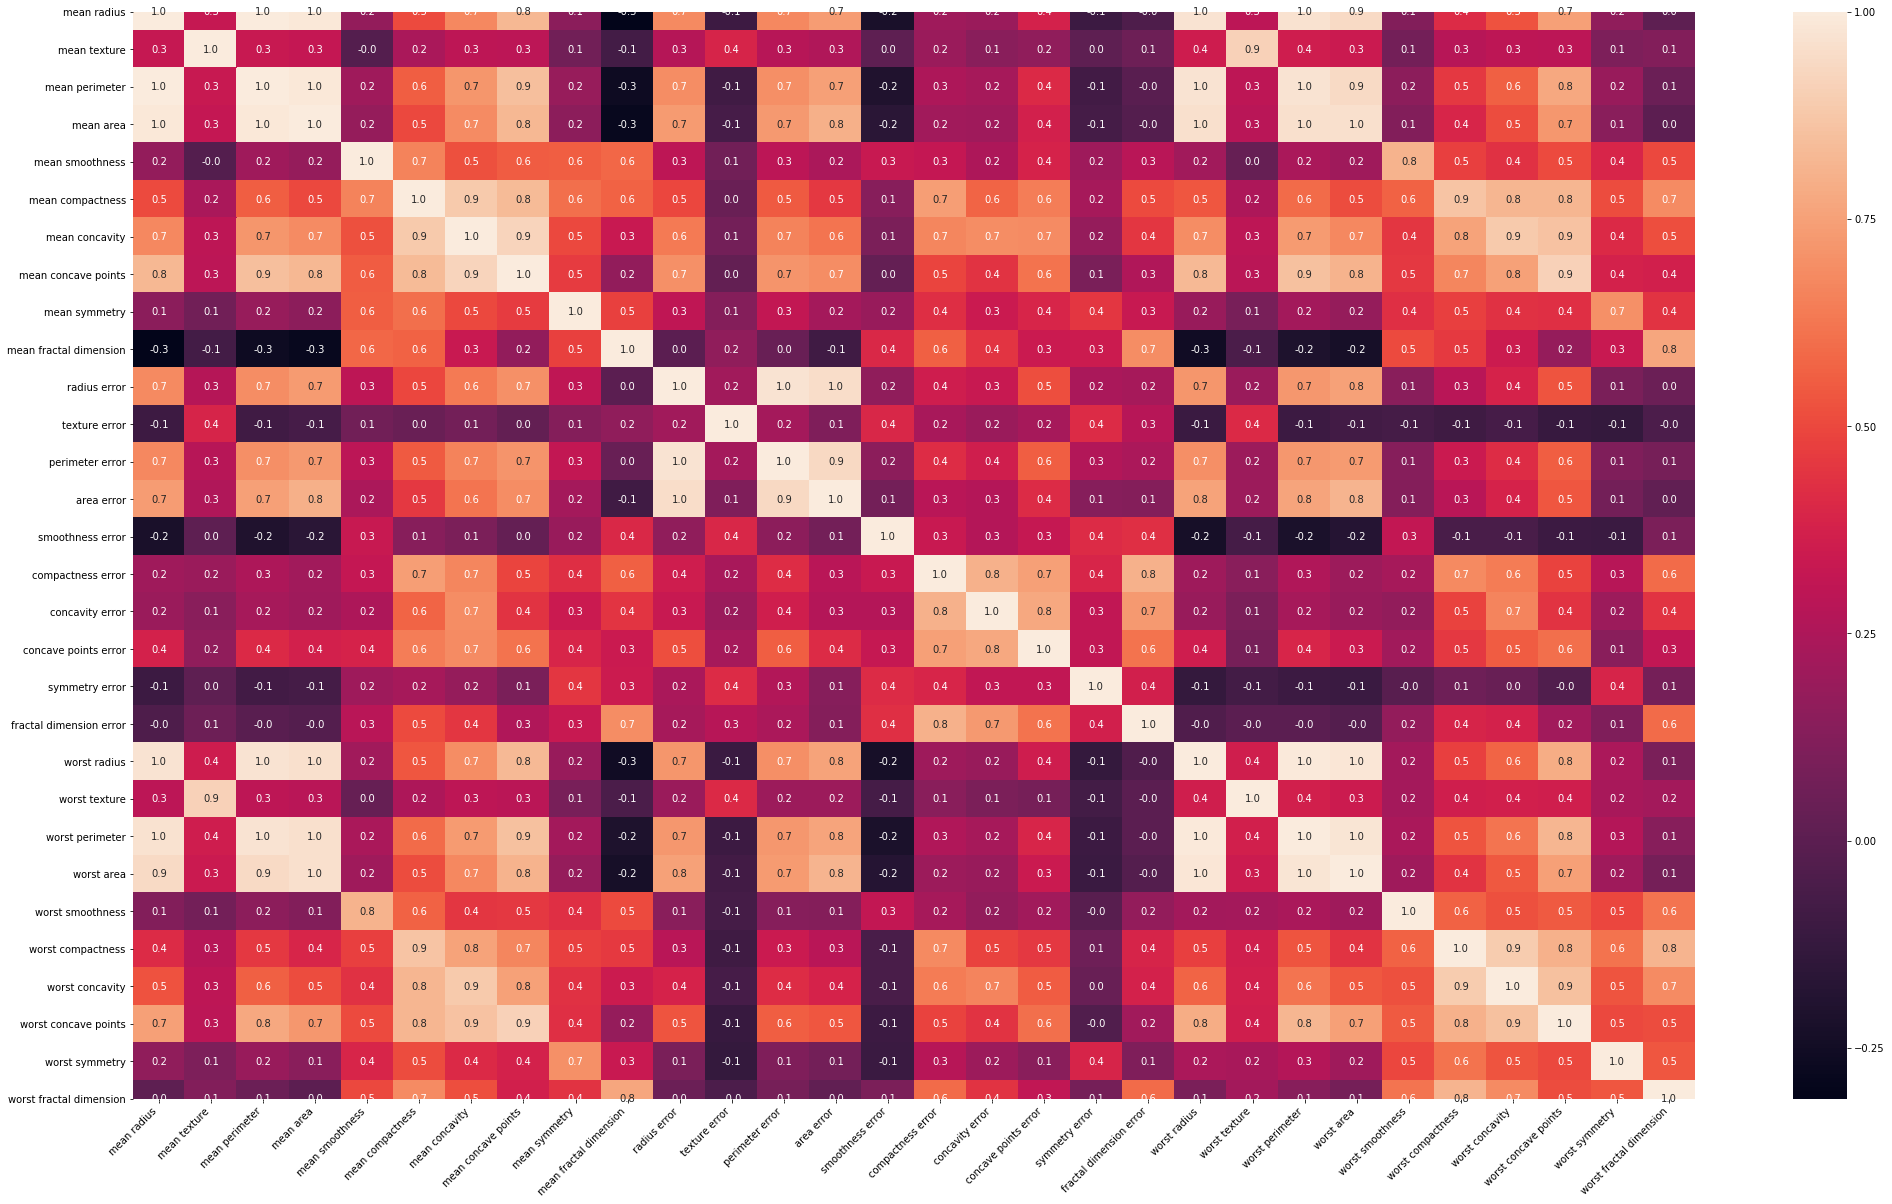

In [14]:
plt.figure(figsize = (35,20))
corr = X.corr()
ax = sns.heatmap(
    corr, 
    annot=True,
    fmt='.1f'
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### We can see the correlation matrix is very hard to read so visualizing all the features using violin plot, swarn plot and joint plots

Normalizing the dataset and then using pandas melt function for visualization.

As the number of features are large we are visualizing them in parts 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

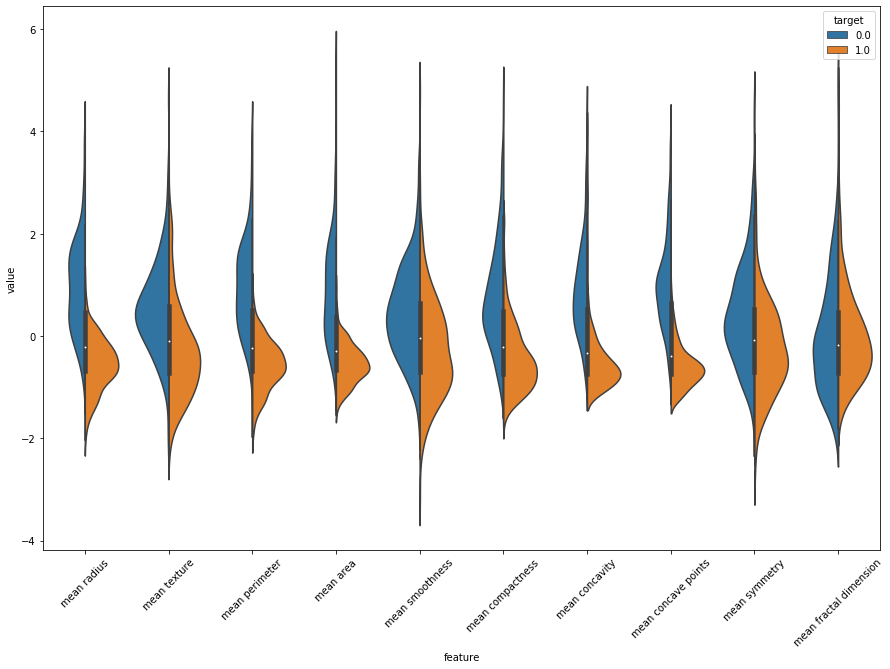

In [15]:
from sklearn.preprocessing import StandardScaler

data=X
data_n=(data-data.mean())/(data.std())

data=pd.concat([data_n.iloc[:,:10],y],axis=1)
data=pd.melt(data,id_vars='target',var_name='feature',value_name='value')

plt.figure(figsize=(15,10))
sns.violinplot(x="feature", y="value", hue="target", data=data,split=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

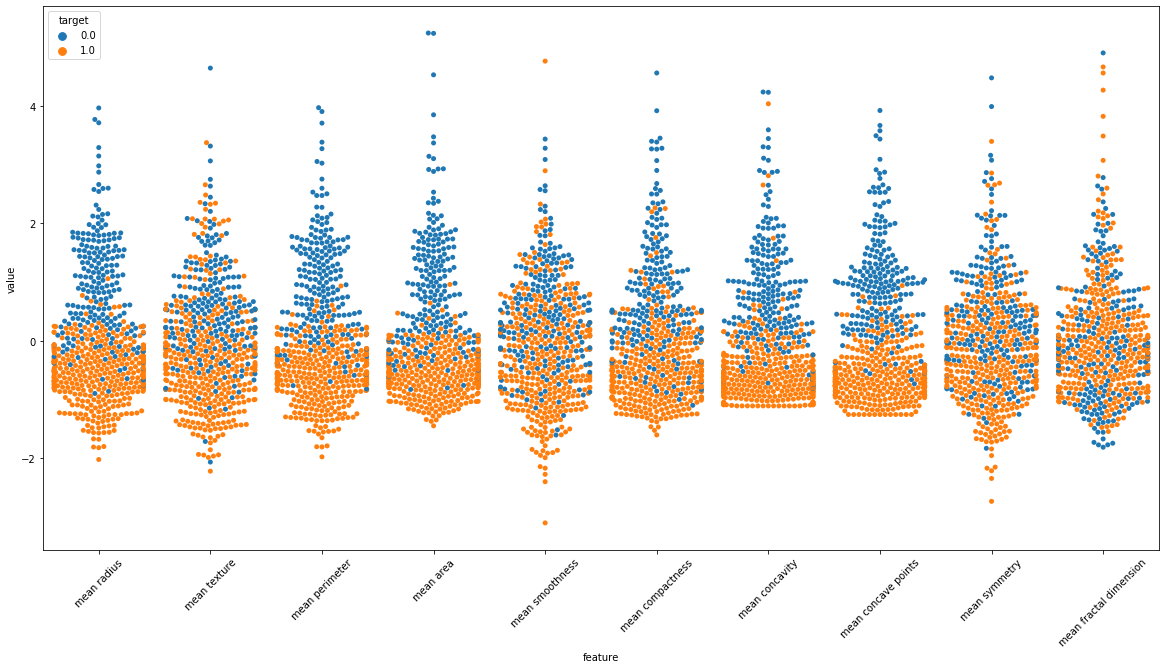

In [16]:
plt.figure(figsize=(20,10))

sns.swarmplot(x="feature", y="value", hue="target", data=data)
plt.xticks(rotation=45)

In [17]:
#Making a list of features which will store correlated feature
X_correlated=[]

We can see that mean radius and mean perimeter seems to have same distribution.
Let us check the correlation using joint plot.
I have plotted limited features here, you can look for more features in the visualization which have same distribution

C:\Users\shadow\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


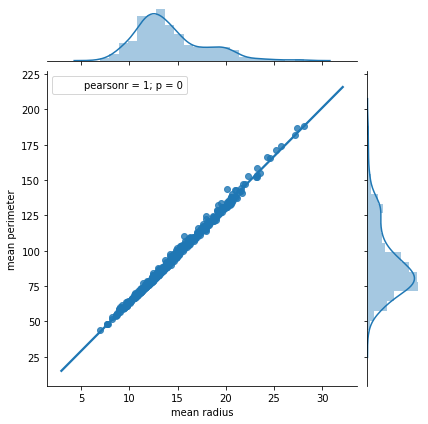

In [18]:
#Seaborn's jointplot displays a relationship between 2 variables (bivariate)
import scipy.stats as stats
j=sns.jointplot(X.loc[:,'mean radius'], X.loc[:,'mean perimeter'], kind="regg")
j.annotate(stats.pearsonr)
plt.show()
X_correlated.append('mean perimeter')

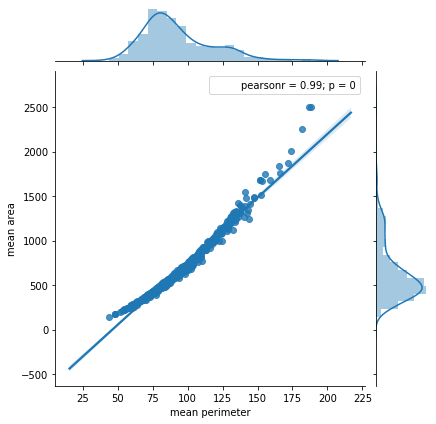

In [19]:
#Seaborn's jointplot displays a relationship between 2 variables (bivariate)
import scipy.stats as stats
j=sns.jointplot(X.loc[:,'mean perimeter'], X.loc[:,'mean area'], kind="regg")
j.annotate(stats.pearsonr)
plt.show()
X_correlated.append('mean area')

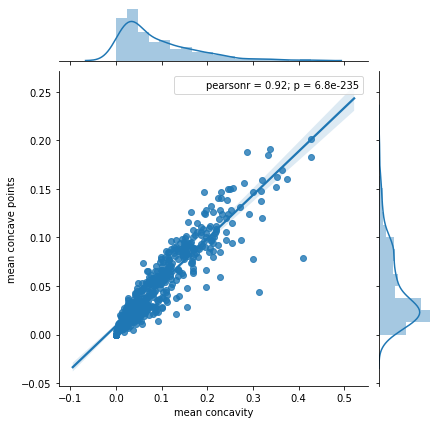

In [20]:
#Seaborn's jointplot displays a relationship between 2 variables (bivariate)
import scipy.stats as stats
j=sns.jointplot(X.loc[:,'mean concavity'], X.loc[:,'mean concave points'], kind="regg")
j.annotate(stats.pearsonr)
plt.show()
X_correlated.append('mean concavity')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

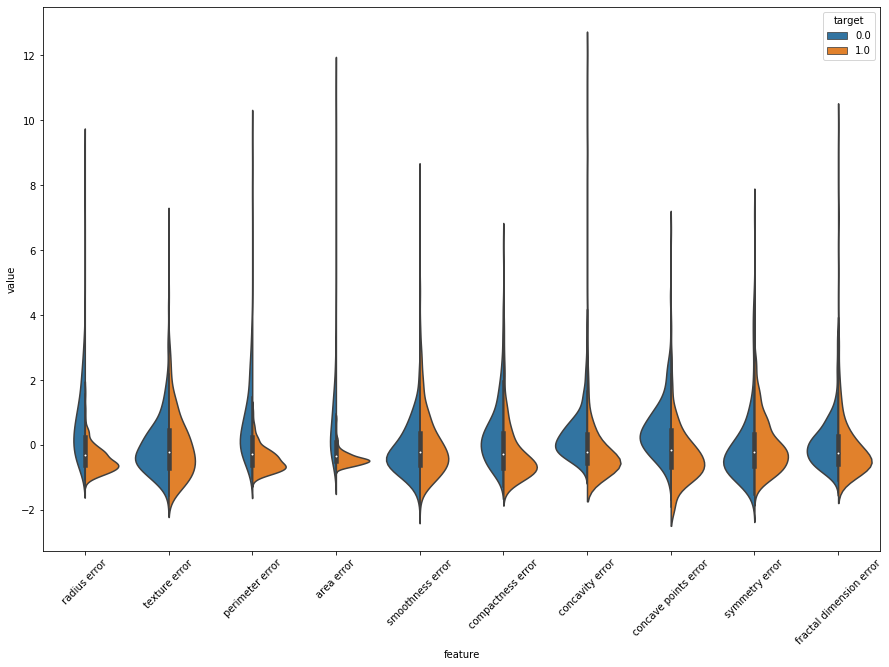

In [21]:
data=pd.concat([data_n.iloc[:,10:20],y],axis=1)
data=pd.melt(data,id_vars='target',var_name='feature',value_name='value')

plt.figure(figsize=(15,10))
sns.violinplot(x="feature", y="value", hue="target", data=data,split=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

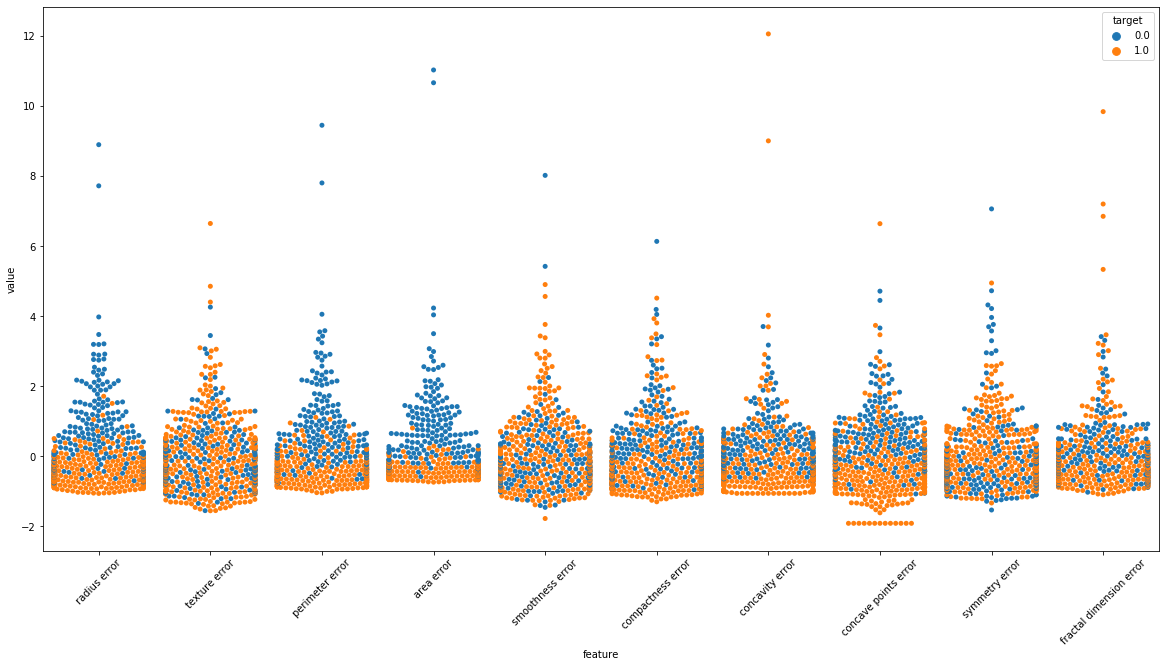

In [22]:
plt.figure(figsize=(20,10))

sns.swarmplot(x="feature", y="value", hue="target", data=data)
plt.xticks(rotation=45)

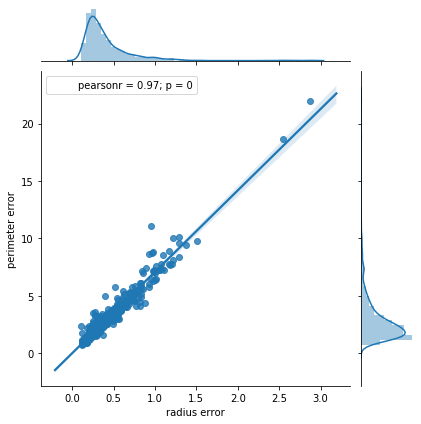

In [23]:
import scipy.stats as stats
j=sns.jointplot(X.loc[:,'radius error'], X.loc[:,'perimeter error'], kind="regg")
j.annotate(stats.pearsonr)
plt.show()
X_correlated.append('perimeter error')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

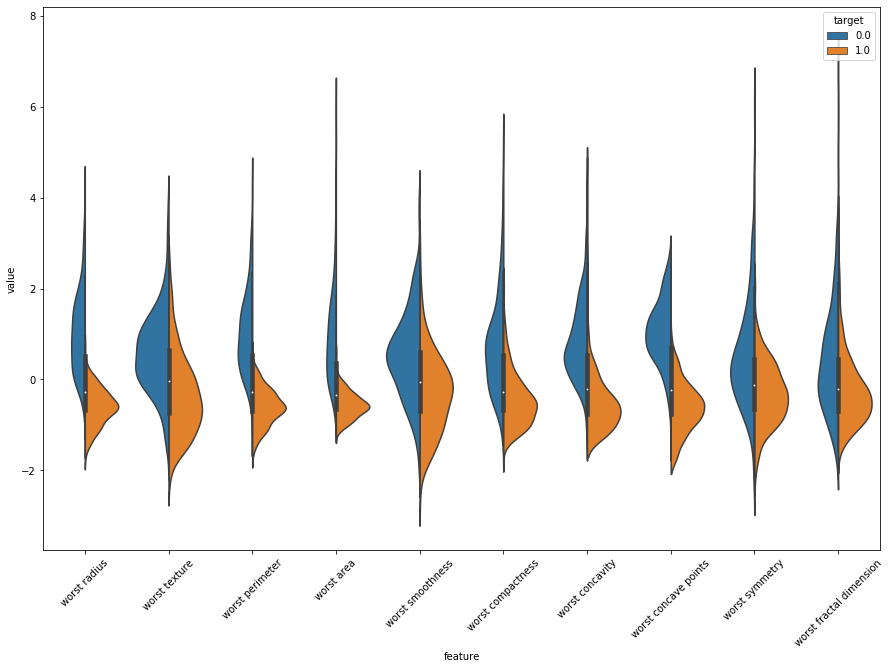

In [24]:
data=pd.concat([data_n.iloc[:,20:],y],axis=1)
data=pd.melt(data,id_vars='target',var_name='feature',value_name='value')

plt.figure(figsize=(15,10))
sns.violinplot(x="feature", y="value", hue="target", data=data,split=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

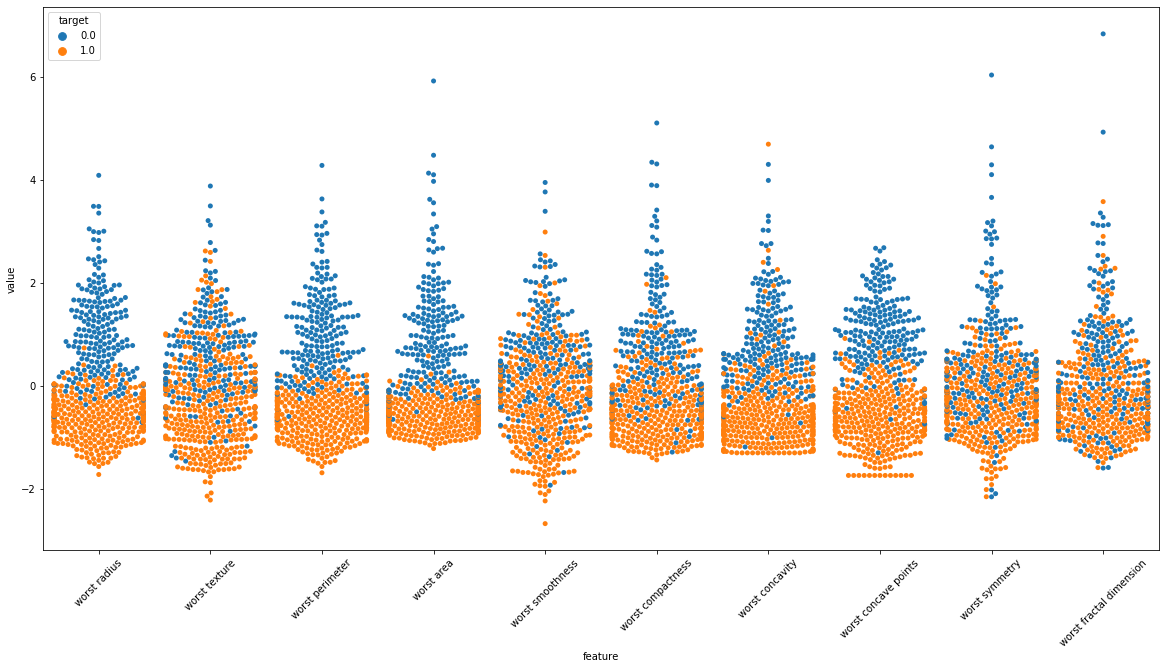

In [25]:
plt.figure(figsize=(20,10))

sns.swarmplot(x="feature", y="value", hue="target", data=data)
plt.xticks(rotation=45)

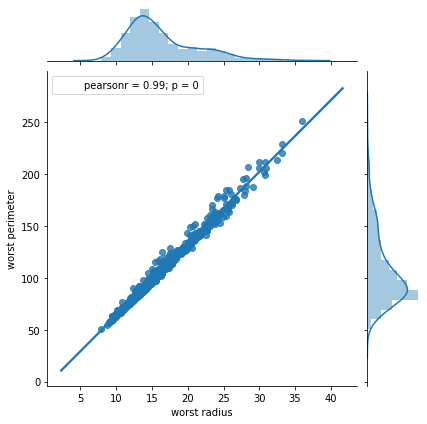

In [26]:
import scipy.stats as stats
j=sns.jointplot(X.loc[:,'worst radius'], X.loc[:,'worst perimeter'], kind="regg")
j.annotate(stats.pearsonr)
plt.show()
X_correlated.append('worst perimeter')

Here is the list of features which seemed correlated and have high pearsonr value
You can check for more such features

In [27]:
X_correlated.append('worst concave points')
X_correlated

['mean perimeter',
 'mean area',
 'mean concavity',
 'perimeter error',
 'worst perimeter',
 'worst concave points']

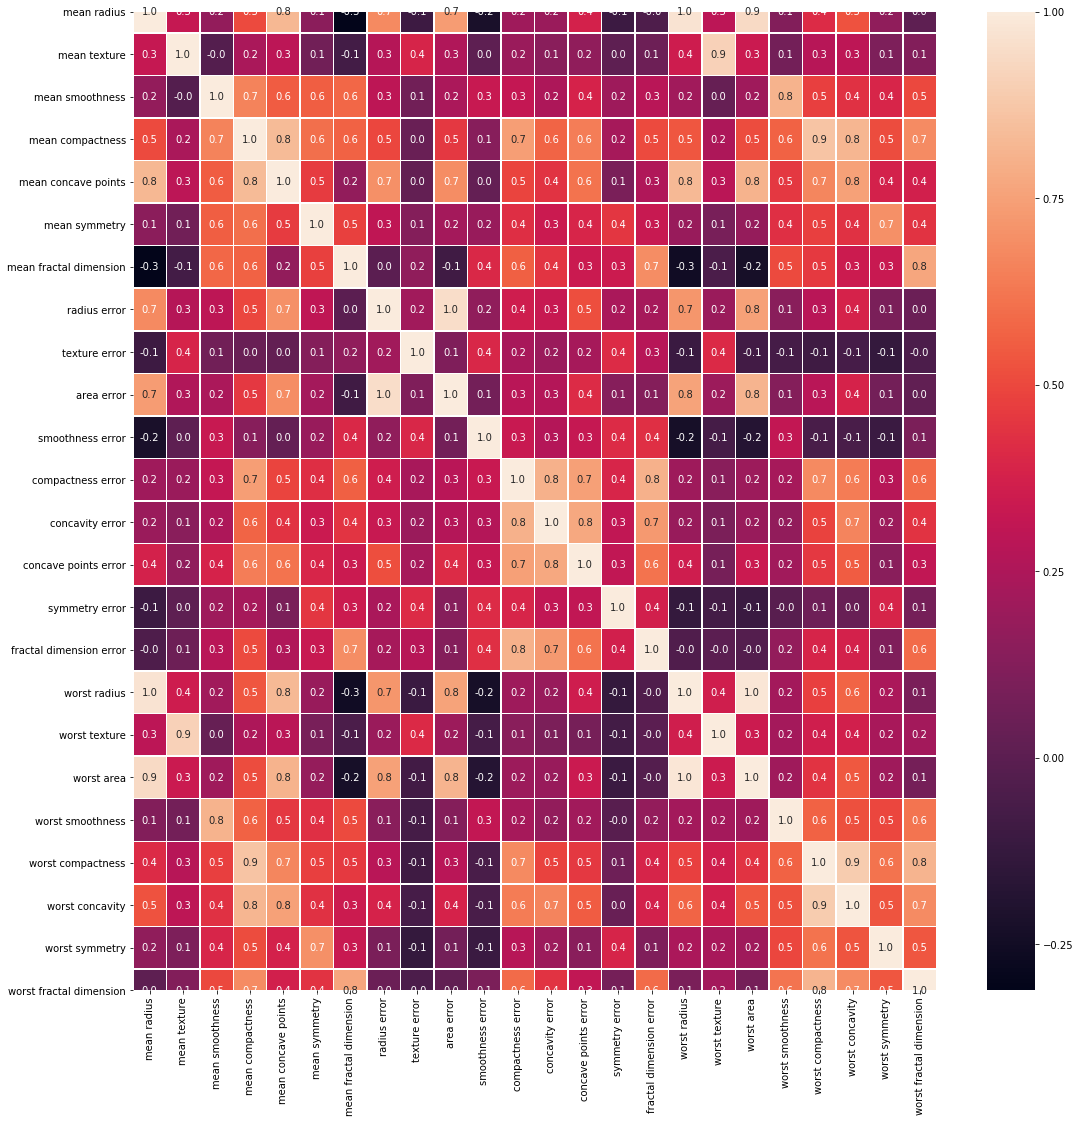

In [28]:
X_mod=X.drop(X_correlated,axis=1)

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_mod.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [29]:
X_mod=X.drop(X_correlated,axis=1)

#### Splitting the dataset and fitting them into models for training
We will build multiple classifiers and see which one gives us best result

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X_mod,y,test_size=0.2,random_state=0)

#### Using RandomForest without any parameter tuning to see the results.

In [31]:
classifier1 = RandomForestClassifier(random_state=0)      
classifier1 = classifier1.fit(X_train,y_train)
accuracy_score(y_test,classifier1.predict(X_test))

C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9649122807017544

#### Using k-fold cross validation to get the score of model

In [32]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.965072463768116

####  Try parameter tuning using gridsearch to get better results

RandomForestClassifier(
    n_estimators='warn',
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)

In [33]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110,130,150],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5, 10],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [8,15,20,50,100]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

In [34]:
grid_search.fit(X_train, y_train).best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1614 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 3312 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   31.7s finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 20}

In [35]:
grid_search.best_score_

0.9648351648351648

#### A very minute increase but it feels good!!

In [36]:
from sklearn.feature_selection import RFECV

classifier2 = RandomForestClassifier(n_estimators=10) 
rfecv = RFECV(estimator=classifier2, step=1, cv=10,scoring='accuracy')  
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])



Optimal number of features : 10
Best features : Index(['mean radius', 'mean texture', 'mean concave points', 'area error',
       'worst radius', 'worst area', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst symmetry'],
      dtype='object')


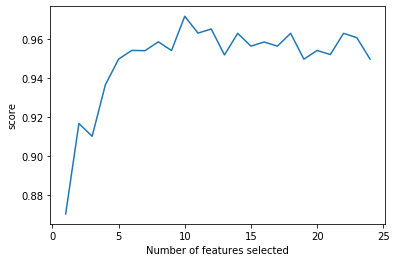

In [37]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression(random_state=0).fit(X_train, y_train)
classifier3.score(X_test, y_test)

C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9473684210526315

#### Using SVM and parameter tuning now to get the model

In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
classifier3.score(X_test, y_test)

C:\Users\shadow\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9473684210526315

In [40]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_score_

0.9648351648351648

In [ ]:
grid_search.best_params_

#### I think we know what we have left with, yayyyy XGBoost

In [42]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
y_pred=classifier.predict(X_test)
classifier.score(X_test,y_test)


0.9912280701754386

#### WHAAAAAAATTT!! WAIT

In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
#accuracies.std()

0.9692753623188406

#### Damn
But we got a pretty good accuracy, you can comment if you find this useful or for any questions you have